# 1. Подготовка данных

### 1.1. Откроем файлы и изучим их.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer, r2_score
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE=4102020

In [2]:
try:
    gold_recovery_train = pd.read_csv(r'datasets/gold_recovery_train.csv')
    gold_recovery_test = pd.read_csv(r'datasets/gold_recovery_test.csv')
    gold_recovery_full = pd.read_csv(r'datasets/gold_recovery_full.csv')
except:
    try:
        gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
        gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
        gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
    except:
        print('Ошибка подгрузки данных')

In [3]:
sets = [gold_recovery_train, gold_recovery_test, gold_recovery_full]

Создадим функцию, которая покажет общую информацию о датасете. Прогоним функцию в цикле для всех датасетов.

In [4]:
def dataset_info(df):
    display(df.head())
    display(df.shape)
    display(df.isna().sum())
    display(df.duplicated().sum())
    print()

In [5]:
for set in sets:
    dataset_info(set)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


(16860, 87)

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

0

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


(5856, 53)

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


0

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


(22716, 87)

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

0

Увидели, что в датасетах очень много признаков, есть пропуски, размерности выборок не совпадают. Присутствует дата в столбце, нельзя ее оставлять в таком виде, либо нужно будет сбросить ее, либо сделать индексом.

### 1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между расчётами и значением признака.

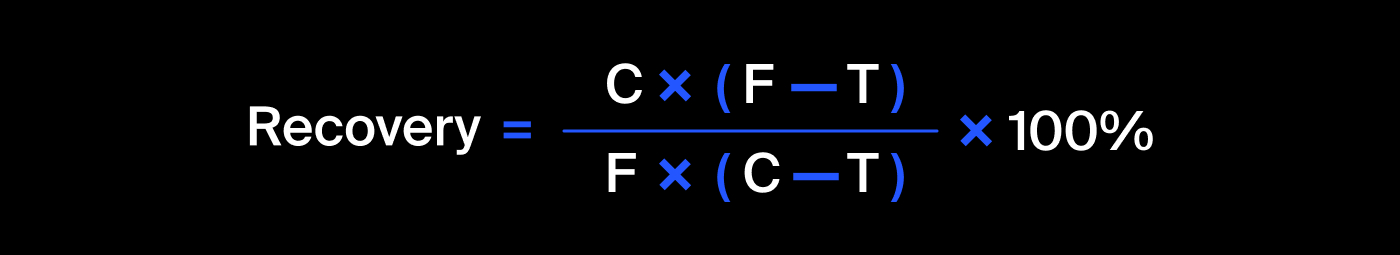

Для rougher.output.recovery:
- F - rougher.input.feed_au
- T - rougher.output.tail_au
- C - rougher.output.concentrate_au

Для final.output.recovery:
- F - rougher.output.concentrate_au
- T - final.output.tail_au
- C - final.output.concentrate_au

Найдем пропуски в соответствующих признаках, нужных для расчета эффективности.

In [6]:
gold_recovery_train[['rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.concentrate_au']].isna().sum()

rougher.input.feed_au              83
rougher.output.tail_au           2249
rougher.output.concentrate_au      82
dtype: int64

Создадим новый датафрейм `recovery_score`. Дропнем все пропуски из него и добавим новый столбец `recovery`.

In [7]:
recovery_score = gold_recovery_train[['rougher.output.recovery', 'rougher.input.feed_au', 'rougher.output.tail_au',\
                                      'rougher.output.concentrate_au']].dropna()

In [8]:
recovery_score['recovery'] = 100 * recovery_score['rougher.output.concentrate_au'] * (recovery_score['rougher.input.feed_au']\
                                                                                     - recovery_score['rougher.output.tail_au'])\
/ (recovery_score['rougher.input.feed_au'] * (recovery_score['rougher.output.concentrate_au']\
                                              - recovery_score['rougher.output.tail_au']))

In [9]:
recovery_score.head()

,rougher.output.recovery,rougher.input.feed_au,rougher.output.tail_au,rougher.output.concentrate_au,recovery
0,87.107763,6.486150,1.170244,19.793808,87.107763
1,86.843261,6.478583,1.184827,20.050975,86.843261
2,86.842308,6.362222,1.162562,19.737170,86.842308
3,87.226430,6.118189,1.079755,19.320810,87.226430
4,86.688794,5.663707,1.012642,19.216101,86.688794


In [10]:
mean_absolute_error(recovery_score['rougher.output.recovery'], recovery_score['recovery'])

1.1290254018238898e-14

Как видим, MAE почти не отличается между нашим расчетом и готовым расчетом в таблице.

### 1.3. Проанализируем признаки, недоступные в тестовой выборке

 Как уже увидели выше в тестовой выборке 53 признака, тогда как в обучающей 87. Выведем в список все признаки всех выборок.

In [11]:
for set in sets:
    display(set.columns.to_list())

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

['date',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

['date',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.s

В тестовой выборке есть данные о сырье перед флотацией и параметры установки во время флотации, есть данные о сырье перед первичной очисткой (грубо говоря черновой концентрат перед первичной очисткой) и параметры установок во время первичной очистки и данные установки во время вторичной очистки. Эти данные невозможно получить/измерить во время выполнения технологического процесса.

### 1.4. Проведем предобработку данных.

Сперва сделаем даты индексами всех изначальных датафреймов.

In [12]:
gold_recovery_train = gold_recovery_train.set_index('date')
gold_recovery_test = gold_recovery_test.set_index('date')
gold_recovery_full = gold_recovery_full.set_index('date')

Главная проблема у нас это пропуски, попробуем просто их всех сбросить.

In [13]:
for set in sets:
    display(set.shape)

(16860, 87)

(5856, 53)

(22716, 87)

In [14]:
gold_recovery_train_dropped = gold_recovery_train.dropna()
gold_recovery_test_dropped = gold_recovery_test.dropna()
gold_recovery_full_dropped = gold_recovery_full.dropna()

In [15]:
display(gold_recovery_train_dropped.shape)
display(gold_recovery_test_dropped.shape)
display(gold_recovery_full_dropped.shape)

(11017, 86)

(5383, 52)

(16094, 86)

Как видим сброс выкидывает серьезную часть данных, в общей сложности ~ 28%. Заменим пропуски предыдущим значением методом `ffill`. 

In [16]:
gold_recovery_train = gold_recovery_train.replace('', np.nan).ffill()
gold_recovery_test = gold_recovery_test.replace('', np.nan).ffill()
gold_recovery_full = gold_recovery_full.replace('', np.nan).ffill()

In [17]:
gold_recovery_train_ffilled = gold_recovery_train.fillna(method='ffill', axis=1)
gold_recovery_test_ffilled = gold_recovery_test.fillna(method='ffill', axis=1)
gold_recovery_full_ffilled = gold_recovery_full.fillna(method='ffill', axis=1)

# 2. Анализ данных

### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Создадим функцию, которая будет строить гистограммы по определенной концентрации металлов.

In [18]:
# на вход будет поступать строка с именем столбца типа 'concentrate_au', 'concentrate_pb' или 'concentrate_ag'
def metal_concentration(concentrate_metal):
    metal_cols=[]
    # перебор по названиям столбцов в полном датасете, ищем <'concentrate_au'> и т.д.
    for col in gold_recovery_full.columns.to_list():
        if concentrate_metal in col:
            metal_cols.append(col)
    # создаем промежуточный датафрейм metal, в котором будут только концентрации металла после каждой операции
    metal = gold_recovery_full_ffilled[metal_cols]
    # сбросим пустые значения концентраций
    metal = metal.dropna()
    # на выходу строим гистограммы
    return display(metal.describe()), metal.hist(bins=30, figsize=(16,9))

Начнем с золота.

,final.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.concentrate_au
count,22716.000000,22716.000000,22716.000000
mean,39.891718,29.119967,17.831509
std,13.540157,10.650273,6.842737
min,0.000000,0.000000,0.000000
25%,42.353890,29.336078,17.894015
50%,44.639019,32.345542,19.995513
75%,46.106662,34.762169,21.562366
max,53.611374,45.933934,28.824507


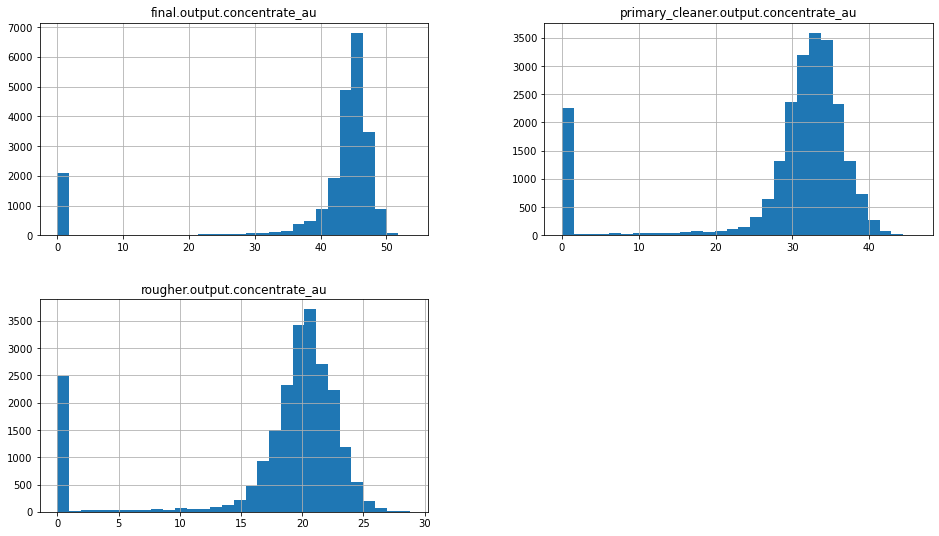

In [19]:
metal_concentration('concentrate_au');

Как видно по гистограммам и описанию данных концентрация золота увеличивается после каждого процесса(флотация, очистка).

Тоже самое сделаем для свинца и серебра.

,final.output.concentrate_ag,primary_cleaner.output.concentrate_ag,rougher.output.concentrate_ag
count,22716.000000,22716.000000,22716.000000
mean,4.768013,7.666972,10.845609
std,2.042594,3.134033,4.406924
min,0.000000,0.000000,0.000000
25%,4.011471,6.756639,10.112351
50%,4.949959,8.256062,11.774115
75%,5.857985,9.690952,13.609712
max,16.001945,16.081632,24.480271


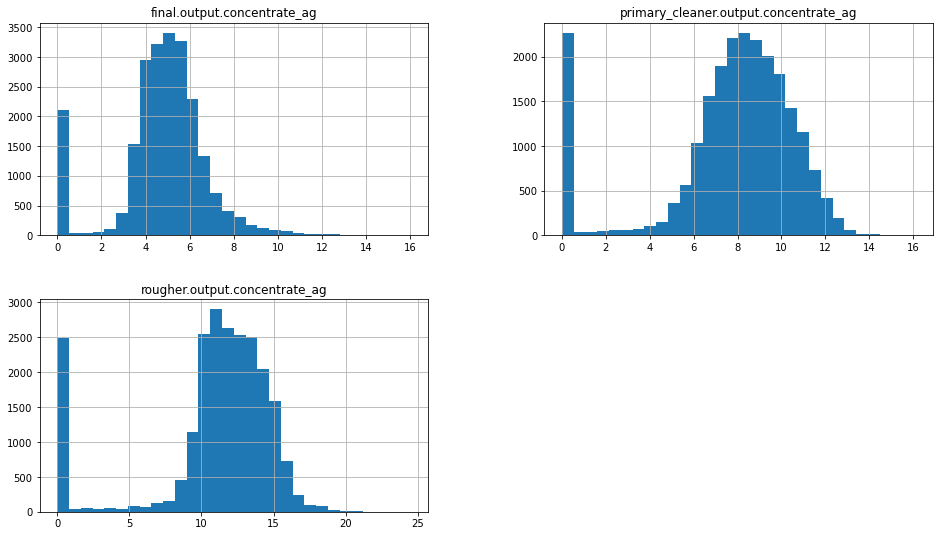

In [20]:
metal_concentration('concentrate_ag');

Как видим, концентрация серебра снижается от операции к операции. Это означает, что серебро уходит в хвосты.

,final.output.concentrate_pb,primary_cleaner.output.concentrate_pb,rougher.output.concentrate_pb
count,22716.000000,22716.000000,22716.000000
mean,9.071366,8.809217,6.886869
std,3.260960,3.798169,2.831347
min,0.000000,0.000000,0.000000
25%,8.737809,7.649745,6.366740
50%,9.910363,9.882876,7.570890
75%,10.927188,11.234420,8.477617
max,17.031899,17.081278,18.394042


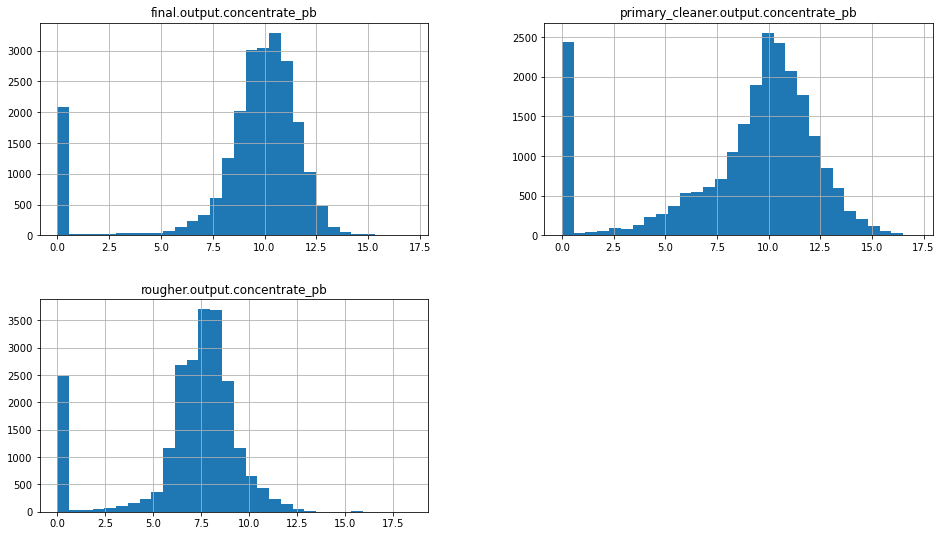

In [21]:
metal_concentration('concentrate_pb');

Концентрация свинца увеличивается на этапе первичной очистки, и она остается примерно такая же, как и в финальном концентрате. То есть первичная очистка повышает концентрацию свинца, а вторичная уже никак не влияет на нее.

### 2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Найдем столбцы, содержащие размеры гранул (англ. `feed_size`) в обучающей и тестовой выборках.

In [22]:
feed_cols=[]
for col in gold_recovery_train.columns.to_list():
    if 'feed_size' in col:
        feed_cols.append(col)
feed_cols

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

In [23]:
feed_cols=[]
for col in gold_recovery_test.columns.to_list():
    if 'feed_size' in col:
        feed_cols.append(col)
feed_cols

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']

Объединим размеры гранул по обучающей и тестовой выборкам.

In [24]:
feed_sizes_train = gold_recovery_train_ffilled[['primary_cleaner.input.feed_size', 'rougher.input.feed_size']]
feed_sizes_test = gold_recovery_test_ffilled[['primary_cleaner.input.feed_size', 'rougher.input.feed_size']]

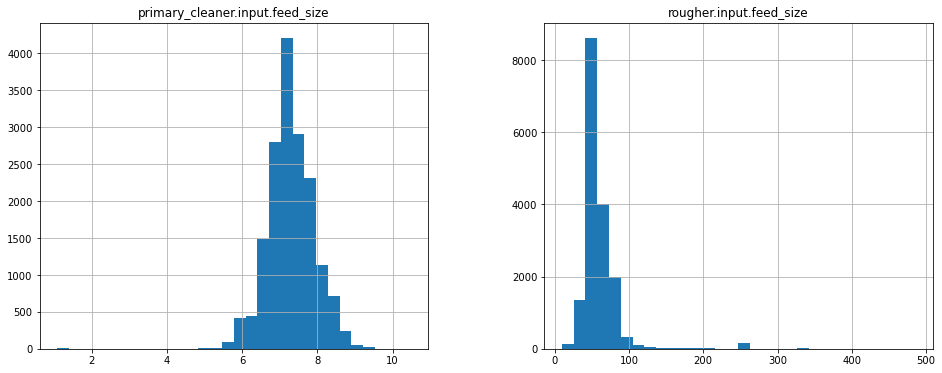

In [25]:
feed_sizes_train.hist(bins=30, figsize=(16,6));

In [26]:
feed_sizes_train.describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,16860.000000,16860.000000
mean,7.297285,60.188595
std,0.619166,30.522242
min,1.080000,9.659576
25%,6.940000,47.548897
50%,7.285000,54.066003
75%,7.700000,65.397249
max,10.470000,484.967466


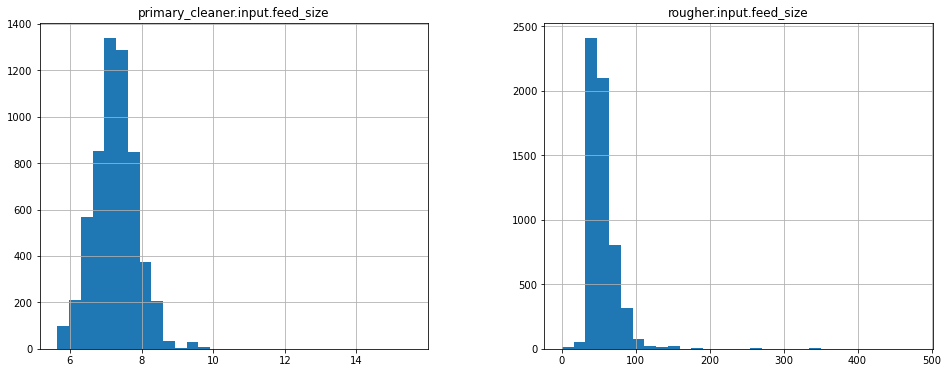

In [27]:
feed_sizes_test.hist(bins=30, figsize=(16,6));

In [28]:
feed_sizes_test.describe()

,primary_cleaner.input.feed_size,rougher.input.feed_size
count,5856.000000,5856.000000
mean,7.264651,55.898866
std,0.611526,22.707969
min,5.650000,0.046369
25%,6.885625,43.852884
50%,7.259333,49.964796
75%,7.650000,61.628003
max,15.500000,477.445473


С размером гранул перед флотацией rougher.input.feed_size не все в порядке, есть отрицательные значения. Заменим все отрицательные значения на средние. Но сперва выведем среднее.

In [29]:
feed_sizes_train['rougher.input.feed_size'].mean()

60.1885953360163

Как видим, некорректные отрицательные значения вносят существенный перекос в среднее значение, найдем медиану.

In [30]:
feed_sizes_train['rougher.input.feed_size'].median()

54.066002564546224

Медиана имеет более правдоподобное значение, заменим отрицательные значения медианой.

In [31]:
feed_sizes_train.loc[feed_sizes_train.loc[:, 'rougher.input.feed_size'] < 0, 'rougher.input.feed_size'] = \
feed_sizes_train['rougher.input.feed_size'].median()

Убедимся, что заменились отрицательные значения

In [32]:
feed_sizes_train.loc[feed_sizes_train.loc[:, 'rougher.input.feed_size'] < 0]

,primary_cleaner.input.feed_size,rougher.input.feed_size
date,,


Снова выведем распределения и гистограммы по гранулам в обучающей и тестовой выборках.

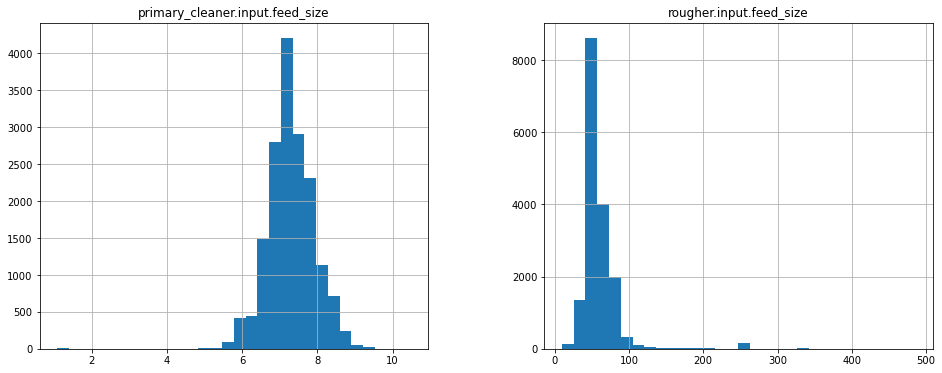

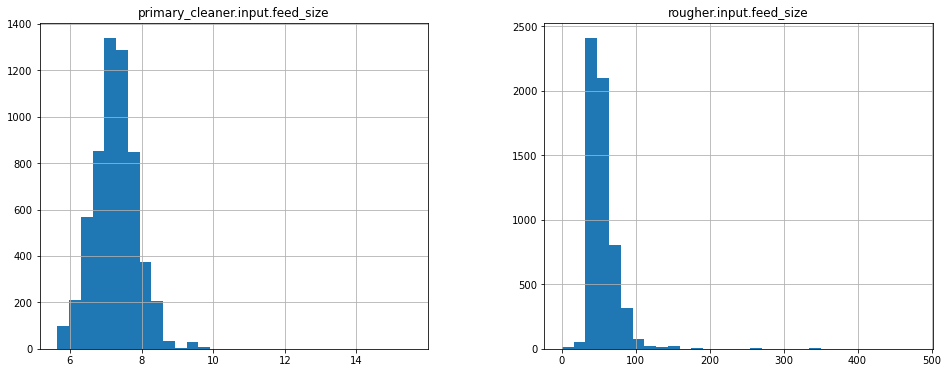

In [33]:
feed_sizes_train.hist(bins=30, figsize=(16,6));
feed_sizes_test.hist(bins=30, figsize=(16,6));

In [34]:
print('\t\t\tTRAIN')
display(feed_sizes_train.describe())
print('\t\t\tTEST')
feed_sizes_test.describe()

			TRAIN


,primary_cleaner.input.feed_size,rougher.input.feed_size
count,16860.000000,16860.000000
mean,7.297285,60.188595
std,0.619166,30.522242
min,1.080000,9.659576
25%,6.940000,47.548897
50%,7.285000,54.066003
75%,7.700000,65.397249
max,10.470000,484.967466


			TEST


,primary_cleaner.input.feed_size,rougher.input.feed_size
count,5856.000000,5856.000000
mean,7.264651,55.898866
std,0.611526,22.707969
min,5.650000,0.046369
25%,6.885625,43.852884
50%,7.259333,49.964796
75%,7.650000,61.628003
max,15.500000,477.445473


Средние и медианы примерно одинаковы, однако стандартное отклонение размера гранул перед флотацией в тестовой выборке в 2 раза меньше, чем в обучающей. Делаем вывод, что все же распределения одинаквы.

### 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Поищем аномальные значения в суммарном распределении.

Найдем столбцы с концентрацией в названии.

In [35]:
concentrate_full=[]
for col in gold_recovery_full.columns.to_list():
    if 'concentrate' in col:
        concentrate_full.append(col)
concentrate_full

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

Сформируем датафрейм чисто с концентрациями всех элементов на всех этапах.

In [36]:
concentrate_full_sum = gold_recovery_full_ffilled[concentrate_full].drop('rougher.calculation.sulfate_to_au_concentrate', axis=1)
concentrate_full_sum

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,8.547551,10.389648,19.529297,34.174427,11.500771,7.101074,28.029297,19.793808
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,8.558743,10.497069,19.369147,34.118526,11.615865,7.278807,28.067063,20.050975
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,8.603505,10.354494,19.167579,33.969464,11.695753,7.216833,27.454037,19.737170
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,7.221879,8.496563,15.978538,28.260743,11.915047,7.175616,27.341277,19.320810
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,9.089428,9.986786,19.199864,33.044932,12.411054,7.240205,27.041023,19.216101
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,6.559174,12.445966,7.056338,32.940215,11.124896,10.984003,30.068876,18.603550
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,6.612376,12.623947,7.542264,32.925325,11.425983,10.888213,29.783972,18.441436
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,7.128896,12.633558,7.941900,31.856742,8.523497,8.955135,22.786467,15.111231


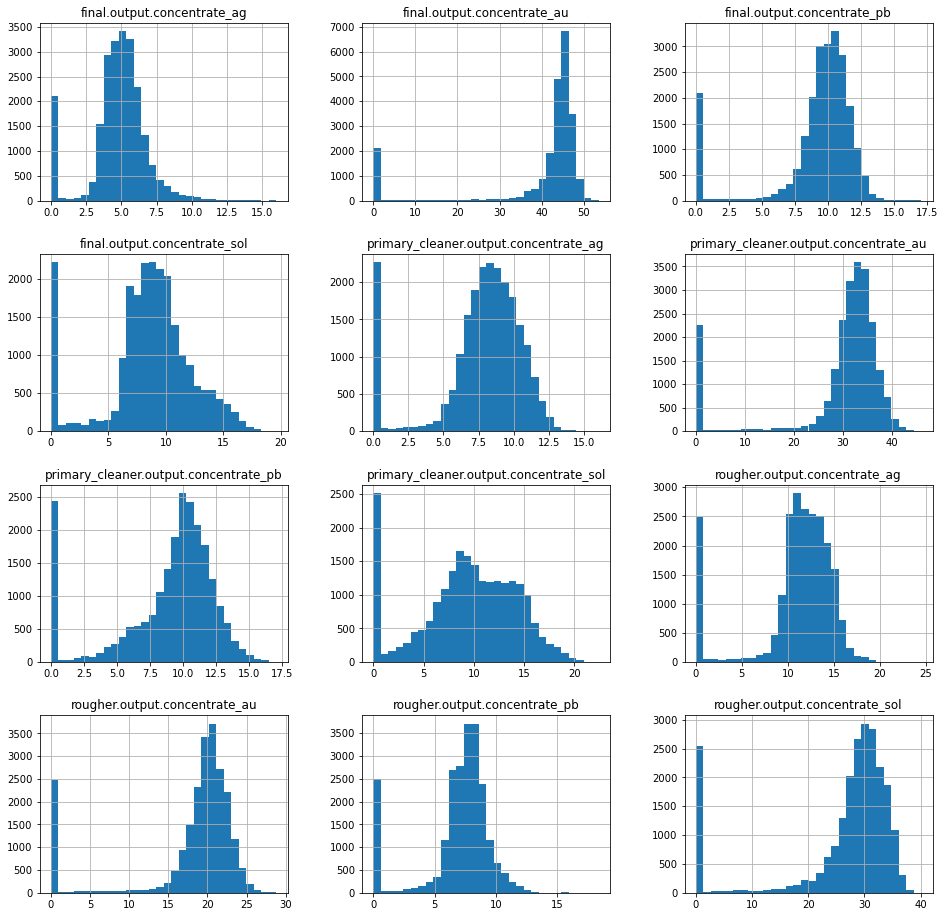

In [37]:
concentrate_full_sum.hist(bins=30, figsize=(16,16));

In [38]:
concentrate_full_sum['rougher.output.concentrate_sum'] = concentrate_full_sum['rougher.output.concentrate_au'] +\
concentrate_full_sum['rougher.output.concentrate_ag'] + concentrate_full_sum['rougher.output.concentrate_pb']

In [39]:
concentrate_full_sum['primary_cleaner.output.concentrate_sum'] = concentrate_full_sum['primary_cleaner.output.concentrate_au'] +\
concentrate_full_sum['primary_cleaner.output.concentrate_ag'] + concentrate_full_sum['primary_cleaner.output.concentrate_pb']

In [40]:
concentrate_full_sum['final.output.concentrate_sum'] = concentrate_full_sum['final.output.concentrate_au'] +\
concentrate_full_sum['final.output.concentrate_ag'] + concentrate_full_sum['final.output.concentrate_pb']

In [41]:
concentrate_full_sum[['rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']].describe()

,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
count,22716.000000,22716.000000,22716.000000
mean,35.563988,45.596156,53.731097
std,13.333254,16.164658,17.898033
min,0.000000,0.000000,0.000000
25%,37.352316,48.808485,58.690559
50%,39.970096,51.525881,60.073814
75%,42.192985,53.160929,60.990602
max,55.568687,60.269003,65.575259


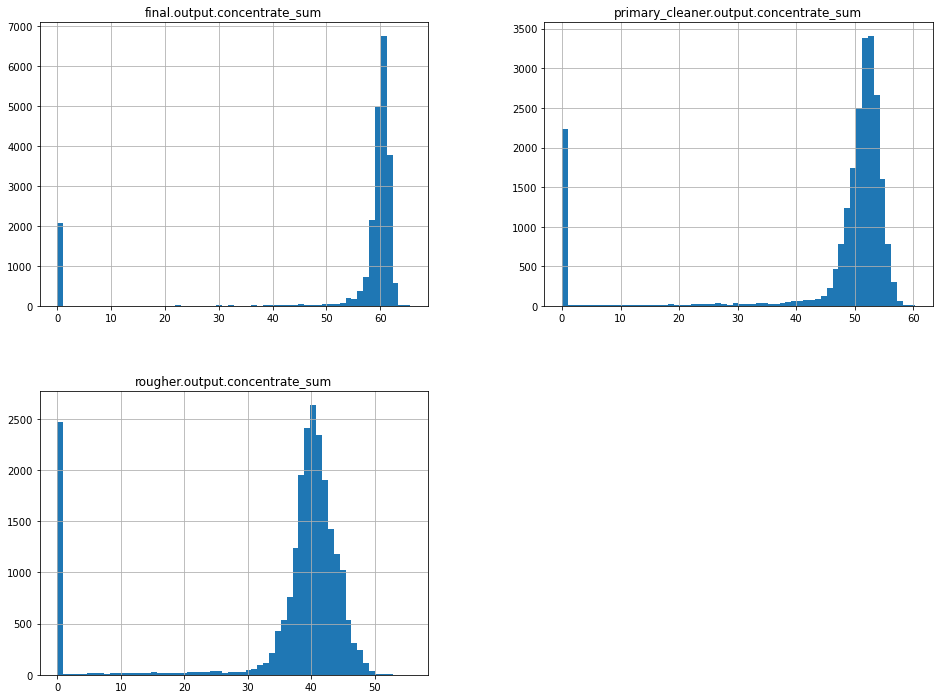

In [42]:
concentrate_full_sum[['rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum',
                      'final.output.concentrate_sum']].hist(bins=60, figsize=(16,12));

Аномалий нет. Нули в суммарной концентрации могут встречаться, так как может быть "пустая" руда без металлов. Нулей становится меньше по ходу техпроцесса, а суммарная концентрация наоборот растет, что логично - обогащение работает.

Однако, наверное все-таки нули надо выкинуть, так как нам нужно построить модель, которая будет предсказывать коэффициент восстановления золота из золотосодержащей руды. А если золота в руде нет, то и обогащать нечего, получается.

Удалим строки с нулевым суммарным значением металлов. Создадим функцию, которая будет удалять строки с суммарными нулевыми концентрациями металлов в каком-либо этапе техпроцесса.

In [43]:
def drop_indices(df):
    indices = df.loc[(df.loc[:,'final.output.concentrate_ag'] +
                      df.loc[:,'final.output.concentrate_au'] +
                      df.loc[:,'final.output.concentrate_pb'] == 0) |
                     (df.loc[:,'rougher.output.concentrate_ag'] +
                      df.loc[:,'rougher.output.concentrate_au'] +
                      df.loc[:,'rougher.output.concentrate_pb'] == 0) |
                     (df.loc[:,'primary_cleaner.output.concentrate_ag'] +
                      df.loc[:,'primary_cleaner.output.concentrate_au'] +
                      df.loc[:,'primary_cleaner.output.concentrate_pb'] == 0)].index
    dropped_df = df.drop(index=indices)
    return dropped_df

In [44]:
drop_indices(gold_recovery_train_ffilled)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [45]:
drop_indices(gold_recovery_full_ffilled)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


В тестовой выборке нет концентраций, поэтому к ней не применяем функцию.

# 3. Модель

### 3.1. Напишем функцию для вычисления итоговой sMAPE.

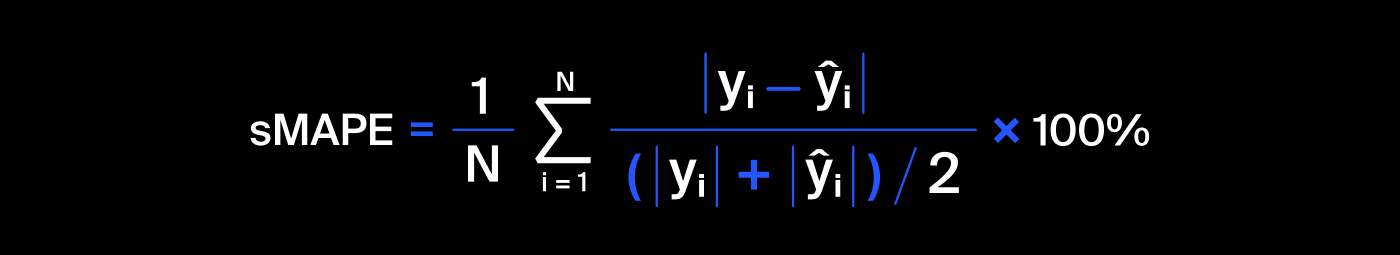
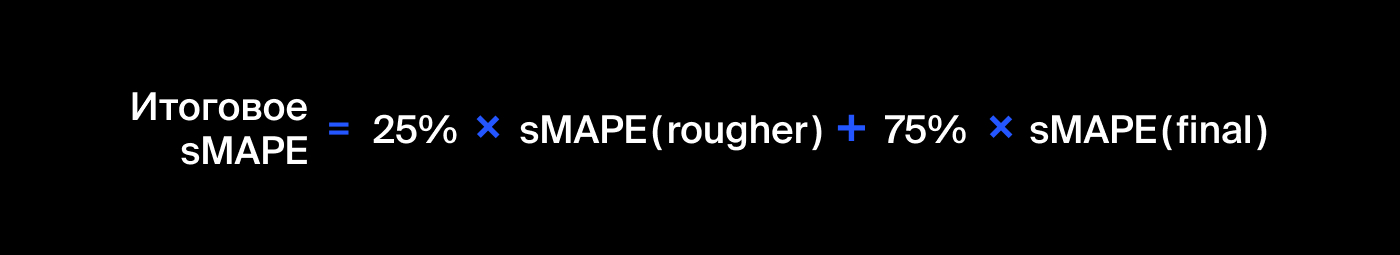

In [46]:
def smape(target_rougher, prediction_rougher, target_final, prediction_final):
    smape_r, smape_f = 0, 0
    
    for i in range(len(target_rougher)):
        s = 100 * (abs(target_rougher[i] - prediction_rougher[i]) / ((abs(target_rougher[i]) + abs(prediction_rougher[i]))/2))
        smape_r += s
    
    for i in range(len(target_final)):
        s = 100 * (abs(target_final[i] - prediction_final[i]) / ((abs(target_final[i]) + abs(prediction_final[i]))/2))
        smape_f += s
    
    return 0.25 * smape_r / len(target_rougher) + 0.75 * smape_f / len(target_final)

### 3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

#### Формируем признаки и цели для линейной регрессии, используя датафреймы, в которых заменили пропуски предыдущими значениями.

Выкинем признаки из обучающей выборки, чтобы они соответствовали признакам тестовой выборки.

In [47]:
features_train = gold_recovery_train_ffilled[gold_recovery_test_ffilled.columns]

In [48]:
features_train.shape

(16860, 52)

Обучим модель сразу на 2х таргетах.

In [49]:
target_train = gold_recovery_train_ffilled[['rougher.output.recovery', 'final.output.recovery']]
target_train.shape

(16860, 2)

Сформируем признаки и целевые признаки тестовой выборки.

In [50]:
features_test = gold_recovery_test_ffilled
features_test.head(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [51]:
test_indices = gold_recovery_test_ffilled.index

In [52]:
target_test = gold_recovery_full_ffilled.loc[test_indices,['rougher.output.recovery', 'final.output.recovery']]
target_test.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078


Обучим линейную регрессию

In [53]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

Сделаем предсказания по обучающей выборке.

In [54]:
predictions = model.predict(features_train)
predictions

array([[83.52429772, 66.08122599],
       [82.21407015, 64.37491359],
       [82.01317718, 64.2006158 ],
       ...,
       [87.92762779, 63.05343343],
       [87.62535985, 62.7985729 ],
       [88.03002168, 62.84798151]])

Предсказания коэффициента восстановления после флотации это `predictions[:,0]`, а финальный коэффициент - `predictions[:,1]`. Найдем sMAPE для обучающей выборки.

In [55]:
smape(target_train['rougher.output.recovery'], predictions[:,0], target_train['final.output.recovery'], predictions[:,1])

13.282338554411597

Получили sMAPE 13%. Посчитаем нашу метрику на тестовой выборке.

In [56]:
predictions = model.predict(features_test)
predictions

array([[86.0505728 , 69.96117016],
       [87.97150985, 68.91813762],
       [88.35595442, 69.75295349],
       ...,
       [87.30161877, 73.83824354],
       [87.64684004, 76.1187046 ],
       [87.26903614, 75.42643296]])

In [57]:
smape(target_test['rougher.output.recovery'], predictions[:,0], target_test['final.output.recovery'], predictions[:,1])

12.311794657372824

Получили 12%. Попробуем отмасштабировать все признаки и заново найти sMAPE с помощью Scaler.

#### Масштабируем признаки.

In [58]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [59]:
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [60]:
model = LinearRegression()
model.fit(features_train_scaled, target_train)

LinearRegression()

In [61]:
predictions = model.predict(features_test_scaled)

In [62]:
smape(target_test['rougher.output.recovery'], predictions[:,0], target_test['final.output.recovery'], predictions[:,1])

12.311794657372834

Как видим, масштабирование признаков не дало существенного улучшения метрики.

#### Используем датафреймы, в которых изначальные пропуски были сброшены.

Попробуем теперь датафреймы, в которых мы сбрасывали все отсутствующие значения, может быть метрика станет лучше. Но сперва сбросим аномальные нулевые концентрации.

In [63]:
drop_indices(gold_recovery_train_dropped)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [64]:
drop_indices(gold_recovery_full_dropped)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [65]:
features_train_dropped = gold_recovery_train_dropped[gold_recovery_test_dropped.columns]

In [66]:
features_train_dropped.shape

(11017, 52)

Обучим модель сразу на 2х таргетах.

In [67]:
target_train_dropped = gold_recovery_train_dropped[['rougher.output.recovery', 'final.output.recovery']]
target_train_dropped.shape

(11017, 2)

Сформируем признаки и целевые признаки тестовой выборки для датафреймов со сброшенными пропусками.

In [68]:
features_test_dropped = gold_recovery_test_dropped
features_test_dropped

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


Далее сбрасываем часть индексов в тестовой выборке, потому что в общем датафрейме мы выкинули те строки, в которых были пропуски, а тестовую выборку мы не трогали, потому что в ней нет аномалий (нулевой суммарной концентрации металлов). Получилось, что в тестовой выборке у нас есть строки, которых нет в общей, поэтому нам сперва нужно найти те строки в тесте, которых нет в общей выборке, затем эти строки сбросить.

In [69]:
indices_to_drop_in_test = features_test_dropped[~features_test_dropped.index.isin(gold_recovery_full_dropped.index)].index
features_test_dropped = features_test_dropped.drop(index=indices_to_drop_in_test)
features_test_dropped

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


Формируем цель для тестовой выборки. Если бы мы не сбросили строки в предыдущем шаге, то здесь мы бы получили пустые строки, и функция бы не считала метрику.

In [70]:
test_indices = features_test_dropped.index

In [71]:
target_test_dropped = gold_recovery_full_dropped.loc[test_indices,['rougher.output.recovery', 'final.output.recovery']]
target_test_dropped

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


Обучим линейную регрессию

In [72]:
model = LinearRegression()
model.fit(features_train_dropped, target_train_dropped)

LinearRegression()

Сделаем предсказания по обучающей выборке.

In [73]:
predictions_dropped = model.predict(features_train_dropped)
predictions_dropped

array([[83.1353851 , 65.82376516],
       [82.17149335, 64.63587281],
       [80.95744044, 64.79603226],
       ...,
       [91.23889988, 69.48957918],
       [90.8841978 , 69.16460762],
       [88.98020611, 68.58545824]])

Предсказания коэффициента восстановления после флотации это `predictions[:,0]`, а финальный коэффициент - `predictions[:,1]`. Найдем sMAPE для обучающей выборки.

In [74]:
smape(target_train_dropped['rougher.output.recovery'], predictions_dropped[:,0], target_train_dropped['final.output.recovery'],
      predictions_dropped[:,1])

7.778109420244773

Получили sMAPE 7.7%. Посчитаем нашу метрику на тестовой выборке.

In [75]:
predictions_dropped = model.predict(features_test_dropped)
predictions_dropped

array([[88.66660227, 71.39656795],
       [91.93015631, 72.18228757],
       [91.62997064, 71.99311947],
       ...,
       [89.52643375, 72.25768574],
       [90.32906233, 74.28076377],
       [89.94582905, 73.50673249]])

In [76]:
smape(target_test_dropped['rougher.output.recovery'], predictions_dropped[:,0], target_test_dropped['final.output.recovery'],
      predictions_dropped[:,1])

8.484177468161139

Получили 8,4% для тестовой выборки.

#### Используем константные модели(среднее и медиану)

In [77]:
target_test_dropped[['rougher.output.recovery', 'final.output.recovery']].describe()

,rougher.output.recovery,final.output.recovery
count,5077.000000,5077.000000
mean,85.331372,69.004897
std,12.919129,7.705291
min,0.000000,0.000000
25%,84.797236,65.802021
50%,87.501382,69.972633
75%,89.820121,73.328419
max,99.169699,100.000000


In [78]:
target_test_dropped['rougher.output.recovery'].shape

(5077,)

In [79]:
mean_rougher_array = np.full((5077, ), target_test_dropped['rougher.output.recovery'].mean())
mean_final_array = np.full((5077, ), target_test_dropped['final.output.recovery'].mean())

In [80]:
median_rougher_array = np.full((5077, ), target_test_dropped['rougher.output.recovery'].median())
median_final_array = np.full((5077, ), target_test_dropped['final.output.recovery'].median())

In [81]:
print('sMAPE для константной модели медианы равен',smape(target_test_dropped['rougher.output.recovery'], median_rougher_array, target_test_dropped['final.output.recovery'],
      median_final_array))

sMAPE для константной модели медианы равен 7.748033509777973


In [82]:
print('sMAPE для константной модели среднего равен',smape(target_test_dropped['rougher.output.recovery'], mean_rougher_array, target_test_dropped['final.output.recovery'],
      mean_final_array))

sMAPE для константной модели среднего равен 7.982701150407371


В конечном счете у константной модели все равно не смогли выиграть (8,4% против 7,9%).

# Вывод.

В рамках проекта ознакомился с технологическим процессом золотодобычи. Изучил данные, предобработал данные двумя способами, применял масштабирование признаков. Обнаружил аномалии в данных, связанные с нулевым суммарным содержанием металлов в руде. Использовал модель линейной регрессии для получения минимального значения sMAPE. Модель обучали на данных с заменой пропусков ближайшими значениями, на данных со сброшенными пропусками, с использованием масштабирования и без оного. Однако константная модель все равно оказалась чуть эффективнее. 

Размышления по поводу того, как можно улучшить метрику:

- более детальное изучение качества данных на входе (аномалии, пропуски, соответствие физики процесса)
- подбор других гиперпараметров
- использование бустинга